## 5. 共起とbigramのネットワーク分析
### 5.1 共起とは
要素が文の中で同時に出現(**共起**)する頻度や組み合わせを分析する主な手法の説明を行う。
#### 形態素の共起
例文
>文章の構成要素が文の中で同時に用いられている情報を分析する。

を形態素解析したものを以下に示す。

In [1]:
import MeCab
import re
import numpy as np

mecab = MeCab.Tagger()

texts = [re.split('[\t|,]', x) for x in mecab.parse('文章の構成要素が文の中で同時に用いられている情報を分析する。').split('\n')]
texts[:-2]

[['文章', '名詞', '一般', '*', '*', '*', '*', '文章', 'ブンショウ', 'ブンショー'],
 ['の', '助詞', '連体化', '*', '*', '*', '*', 'の', 'ノ', 'ノ'],
 ['構成', '名詞', 'サ変接続', '*', '*', '*', '*', '構成', 'コウセイ', 'コーセイ'],
 ['要素', '名詞', '一般', '*', '*', '*', '*', '要素', 'ヨウソ', 'ヨーソ'],
 ['が', '助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ'],
 ['文', '名詞', '一般', '*', '*', '*', '*', '文', 'ブン', 'ブン'],
 ['の', '助詞', '連体化', '*', '*', '*', '*', 'の', 'ノ', 'ノ'],
 ['中', '名詞', '非自立', '副詞可能', '*', '*', '*', '中', 'ナカ', 'ナカ'],
 ['で', '助詞', '格助詞', '一般', '*', '*', '*', 'で', 'デ', 'デ'],
 ['同時に', '副詞', '一般', '*', '*', '*', '*', '同時に', 'ドウジニ', 'ドージニ'],
 ['用い', '動詞', '自立', '*', '*', '一段', '未然形', '用いる', 'モチイ', 'モチイ'],
 ['られ', '動詞', '接尾', '*', '*', '一段', '連用形', 'られる', 'ラレ', 'ラレ'],
 ['て', '助詞', '接続助詞', '*', '*', '*', '*', 'て', 'テ', 'テ'],
 ['いる', '動詞', '非自立', '*', '*', '一段', '基本形', 'いる', 'イル', 'イル'],
 ['情報', '名詞', '一般', '*', '*', '*', '*', '情報', 'ジョウホウ', 'ジョーホー'],
 ['を', '助詞', '格助詞', '一般', '*', '*', '*', 'を', 'ヲ', 'ヲ'],
 ['分析', '名詞', 'サ変接続', '*', '*'

True

この文において用いられた「名詞」を集計したものを示す。  
表の数値は共起した回数を示す。

In [2]:
target_texts = [t[0] for t in texts[:-2] if (t[1] == '名詞')&(t[2] in ['一般', 'サ変接続'])]
target_texts

['文章', '構成', '要素', '文', '情報', '分析']

In [3]:
import pandas as pd

d1 = pd.read_csv('study/参考書/テキストアナリティクス/co_occur.csv', encoding='shift-jis')
d1

,語1,語2,Freq
0,文章,構成,1
1,文章,要素,1
2,文章,文,1
3,文章,情報,1
4,文章,分析,1
5,構成,要素,1
6,構成,文,1
7,構成,情報,1
8,構成,分析,1
9,要素,文,1


bigramは、隣接する要素間の共起である。  
今回の例のbigramを示す。  
集計の対象外とした語はすべて無視して、集計した語と語の隣接を問題としている。

In [4]:
d1.loc[[0,5,9,12,14]]

,語1,語2,Freq
0,文章,構成,1
5,構成,要素,1
9,要素,文,1
12,文,情報,1
14,情報,分析,1


#### 形態素タグのn-gram
コーパスに基づいた言語学や計量文体学では、形態素タグで集計し、そのunigramやbigramを分析することがある。  
例文の形態素タグのbigramの集計結果を示す。

In [5]:
d2 = pd.read_csv('study/参考書/テキストアナリティクス/pos.csv', encoding='shift-jis')
d2

,形態素1,形態素2,共起
0,普通名詞,接続助詞,2
1,普通名詞,格助詞,2
2,サ変名詞,動詞,1
3,サ変名詞,普通名詞,1
4,副詞,動詞,1
5,副詞的名詞,格助詞,1
6,動詞,動詞性接尾辞,1
7,動詞,句点,1
8,動詞性接尾辞,動詞性接尾辞,1
9,動詞性接尾辞,普通名詞,1


### 5.2 共起の視覚化
#### ネットワークグラフ
共起データを視覚化する方法として、**ネットワークグラフ**が多く用いられる。  
ネットワークグラフとは、構成要素を点とし、共起関係がある点と点を線で連結するグラフである。  
矢印のついた**有向グラフ**と矢印のない**無向グラフ**がある。  
構成要素を示す点をノード、または頂点と呼び、ノードの多さはネットワークのサイズを表す。  
点と点を連結した線を辺、またはエッジと呼び、辺の多さはネットワークの複雑さを表す。  

In [50]:
styles = {'node_size':2000,
          'font_size':15,
          'node_color':'lightblue',
          'with_labels':True,
          'font_weight':'bold',
          'font_family':'MS Gothic'}

def make_graph(G, nodes, edges, pos, styles=styles, label=True):
    # nodeデータの追加
    G.add_nodes_from(nodes)
 
    # edgeデータの追加
    G.add_weighted_edges_from(edges)
    edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
   
    if not isinstance(pos, dict):
        pos = pos(G)
    
    # ネットワークの可視化
    nx.draw(G, pos=pos, **styles)
    if label:
        nx.draw_networkx_edge_labels(G1, pos=pos, edge_labels=edge_labels) #エッジのラベルを描画

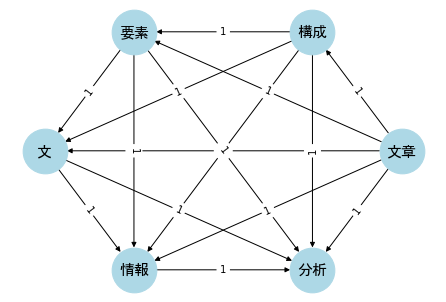

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

G1 = nx.DiGraph()
nodes1 = target_texts
edges1 = [(d1.loc[i, '語1'], d1.loc[i, '語2'], d1.loc[i, 'Freq']) for i in range(len(d1))]

make_graph(G1, nodes1, edges1, pos=nx.circular_layout)

#### ネットワークの統計量
##### 基本要素の数と次数
ネットワークにおける基本要素はノードとエッジである。  
各ノードにかかるエッジの数を**次数**と呼ぶ。

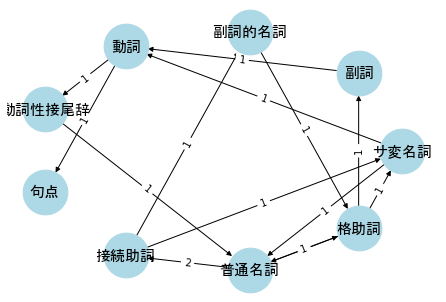

In [107]:
G2 = nx.DiGraph()
nodes2 = list(np.unique([d2.形態素1]+[d2.形態素2]))
edges2 = [(d2.loc[i, '形態素1'], d2.loc[i, '形態素2'], d2.loc[i, '共起']) for i in range(len(d2))]

make_graph(G2, nodes2, edges2, pos=nx.circular_layout)

例えば、「動詞」には4本のエッジがつながっているので、ノード「動詞」の次数は4である。

In [16]:
nx.degree(G2)

DiDegreeView({'サ変名詞': 4, '副詞': 2, '副詞的名詞': 2, '動詞': 4, '動詞性接尾辞': 4, '句点': 1, '接続助詞': 3, '普通名詞': 5, '格助詞': 5})

##### 密度
**密度**は、ネットワークの混み具合を表す度合いであり、  
有向グラフでは$density=m/(n-1)$、無向グラフでは$density=2m/(n-1)$で定義されている。  
$n$はノード数、$m$はエッジ数である。

In [17]:
nx.density(G2)

0.20833333333333334

##### 中心性
**中心性**とは、あるノードのネットワーク内における中心度のことである。  
どの指標で中心度を測るかによって、次数中心性、近接中心性、固有ベクトル中心性、媒介中心性などがある。  
次数中心性では、他のノードとの間にエッジを多く持つノードほど、中心性が高いことになる。  
近接中心性はグラフ上の、あるノードと他のノードの近さに関する指標であり、次の式で定義される。
$$
C(i)=\frac{1}{\sum_{all\ i,j}^{i\neq j}d(n_i,n_j)}
$$
$d(n_i,n_j)$は、ノード$n_i$とノード$n_j$の最短距離である。  
近接中心性は値が高いほど中心性が高い。  
しかし、ネットワークのノード数が異なるとお互いに比較することができないため、次のように標準化した式を用いる。
$$
C'(i)=\frac{n-1}{\sum_{all\ i,j}^{i\neq j}d(n_i,n_j)}
$$
媒介中心性は、あるノードを通過しないと他のノードに到達できない度合いである。  
あるノードが、それ以外の2つのノードを結ぶ最短経路上にあるかどうかについての指標であり、値が大きいほど中心性が高い。  
固有ベクトル中心性は、隣接行列の第1固有ベクトルを用いて、隣接するノードの中心性を表す指標である。  
次数の多さよりも、中心性の高いノードと接続していることに注目するものであり、値が大きいほど中心性が高い。

In [18]:
# 次数中心性
degree_centers = nx.degree_centrality(G1)
sorted(degree_centers.items(), key=lambda x: x[1], reverse=True)[:5]

[('文章', 1.0), ('構成', 1.0), ('要素', 1.0), ('文', 1.0), ('情報', 1.0)]

In [19]:
# 近接中心性
close_centers = nx.closeness_centrality(G1)
sorted(close_centers.items(), key=lambda x: x[1], reverse=True)[:5]

[('分析', 1.0), ('情報', 0.8), ('文', 0.6), ('要素', 0.4), ('構成', 0.2)]

In [20]:
# 媒介中心性
between_centers = nx.betweenness_centrality(G1)
sorted(between_centers.items(), key=lambda x: x[1], reverse=True)[:5]

[('文章', 0.0), ('構成', 0.0), ('要素', 0.0), ('文', 0.0), ('情報', 0.0)]

#### クラスターの係数
クラスターの係数はノードの近傍の関係を示す度合いであり、あるノードに隣接するノード同士の間につながりがあるかどうか、  
つまり、三角形ループが形成されているかどうかについての指標である。  
**推移性**ともよばれ、グローバルクラスター係数やローカルクラスター係数などに細分化できる。  
**グローバルクラスター係数**は、すべてのノードのクラスター係数の平均値のことである。  
**ローカルクラスター係数**は、個別のノードのクラスター係数のことである。  
グローバルクラスター係数は、次の式で定義される。  
$B$は、隣接行列$A$の内積の主対角成分をゼロにした行列である。  
$$
B_{transitivity}=\frac{\sum(B×A)}{\sum(B)}=\frac{3×三角形の数}{2つのエッジを持つノード数}
$$

ローカルクラスター係数は、次の式で定義される。  
式の中の$v_i$はノード、$k_i$はノード$v_i$の次数を示す。
$$
L_{transitivity}=\frac{2×v_iを含む三角形の数}{k_i(k_i-1)}
$$
クラスター係数が大きいほど、ネットワークグラフ全体が1つにまとまる。

#### パスとその長さ
**パス**はノードの間をつなぐルートのことを指す。  
つまり、ノード$v_i$からノード$v_k$にたどり着くために通るエッジの数である。  
平均パスが短く、クラスター係数が高いネットワークを**スモールワールドネットワーク**と呼ぶ。

#### コミュニティ分析
1つのネットワークをいくつかのサブネットワークに分けたものを**コミュニティ**と呼ぶ。  
コミュニティの抽出は、オーバーラッピングを考えない方法とオーバーラッピングを考える方法に大別される。  
ここでのオーバーラッピングとは、あるノードが複数のコミュニティに属することを示す。  

(-1.0, 1.0)

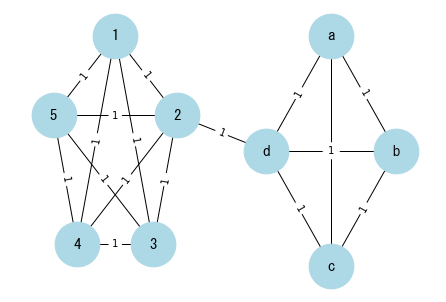

In [89]:
# Graphオブジェクトの作成
G3 = nx.Graph()
 
# nodeデータの追加
com1 = ["a", "b", "c", "d"]
com2 = ["1", "2", "3", "4", "5"]
nodes3 = com1 + com2

edges3 = []
for i in range(len(com1)):
    for j in range(len(com1[i:])):
        edges3 += [(com1[i], com1[i+j], 1)]

for i in range(len(com2)):
    for j in range(len(com2[i:])):
        edges3 += [(com2[i], com2[i+j], 1)]
edges3+= [("2", "d", 1)]

pos = {}
n1=len(com1)
for i in np.arange(n1):
    pos.update({com1[i]: (0.5+0.3*np.sin(2*np.pi/n1*i), 0.8*np.cos(2*np.pi/n1*i))})

n2=len(com2)
for i in np.arange(n2):
    pos.update({com2[i]: (-0.5+0.3*np.sin(2*np.pi/n2*i), 0.8*np.cos(2*np.pi/n2*i))})

make_graph(G3, nodes3, edges3, pos=pos)
plt.xlim(-1,1)
plt.ylim(-1,1)

**コミュニティ分析**はネットワークを何らかの特徴によりいくつかのサブネットワークに分割して、分析を行う方法である。  
コミュニティのクラスタリングは、次の$Q$値が最大になるような分割を行う方法が多く用いられている。  
$A_{ij}$は隣接行列の要素、$M$はエッジの総数、$k_i$はノード$i$の次数、  
$\delta(c_i,c_j)$はノード$i$とノード$j$が同じクラスターに属する場合は1を、そうでない場合には0をとる。
$$
Q=\frac{1}{2M}\sum\biggl(A_{ij}-\frac{k_ik_j}{2M}\delta(c_i,c_j) \biggr)
$$

何らかの制約条件の下で計算を行うアルゴリズムとしては、焼き増し法、ランダム・ウォーク法、全探索法などがある。

(-1.0, 1.0, -1.0, 1.0)

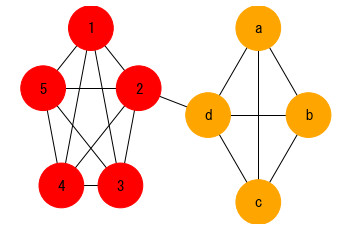

In [100]:
from networkx.algorithms.community import greedy_modularity_communities

colors = ['red', 'orange', 'yellow', 'green', 'lightgreen', 'royalblue', 'blue', 'violet']
lst_m = greedy_modularity_communities(G3)
color_map_m = ['black'] * nx.number_of_nodes(G3)
counter = 0
for c in lst_m:
    for n in c:
        color_map_m[nodes3.index(n)] = colors[counter]
    counter = counter + 1

nx.draw_networkx_edges(G3, pos);
nx.draw_networkx_nodes(G3, pos, node_size=2000, node_color=color_map_m);
nx.draw_networkx_labels(G3, pos=pos, font_size=15, font_family='MS Gothic');
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis('off')

(-0.2914358920733318,
 0.42257592955985235,
 -1.0924986743262188,
 0.9424721608505929)

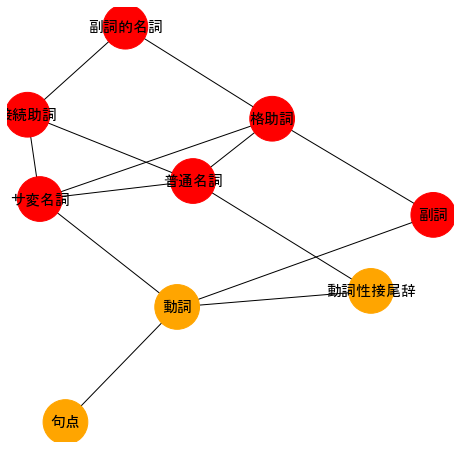

In [116]:
from networkx.algorithms.community import greedy_modularity_communities

g2 = nx.Graph(G2)

colors = ['red', 'orange', 'yellow', 'green', 'lightgreen', 'royalblue', 'blue', 'violet']
lst_m = greedy_modularity_communities(g2)
color_map_m = ['black'] * nx.number_of_nodes(g2)
counter = 0
for c in lst_m:
    for n in c:
        color_map_m[nodes2.index(n)] = colors[counter]
    counter = counter + 1

pos = nx.spring_layout(g2, k=0.25,iterations=30)

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(g2, pos);
nx.draw_networkx_nodes(g2, pos, node_size=2000, node_color=color_map_m);
nx.draw_networkx_labels(g2, pos=pos, font_size=15, font_family='MS Gothic');
plt.axis('off')

In [102]:
greedy_modularity_communities(G2)

IndexError: list index out of range

### 5.3 ネットワーク分析例
#### データの俯瞰

In [36]:
d3 = pd.read_csv('study/参考書/テキストアナリティクス/anketo.csv', encoding='shift-jis')
d3.head()

,Term1,Term2,度数
0,学費を,低く/安く,20
1,単位を,取り,4
2,もっと,取り,3
3,自動車通学の,許可。,3
4,学食を,安く。,3


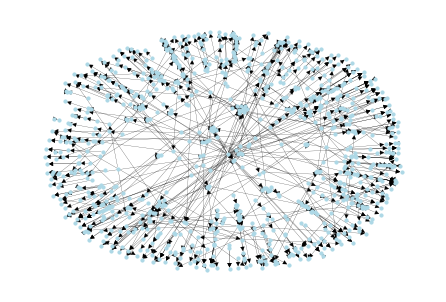

In [79]:
styles = {'node_size':10,
          'font_size':15,
          'node_color':'lightblue',
          'with_labels':False,
          'font_weight':'bold',
          'width':0.2,
          'font_family':'MS Gothic'}

G4 = nx.DiGraph()
nodes4 = np.unique([d3.Term1]+[d3.Term2])
edges4 = [(d3.loc[i, 'Term1'], d3.loc[i, 'Term2'], d3.loc[i, '度数']) for i in range(len(d3))]

make_graph(G4, nodes4, edges4, pos=nx.spring_layout, styles=styles, label=False)

#### 基本統計量を用いた探索的分析
次数を求め、その大きい順に上位5つを示す。

In [52]:
sorted(dict(G4.degree).items(), key=lambda x:x[1], reverse=True)[:5]

[('もっと', 39), ('して欲しい。', 14), ('無い。', 10), ('やって欲しい。', 9), ('分かり', 8)]

In [53]:
np.argsort(list(dict(G4.degree).values()))[::-1][:5]

array([134,  63, 677, 140, 319], dtype=int64)

「もっと」がもっとも次数が高い。  
「もっと」とパス1の長さでリンクされているノードを抽出し、作成したネットワークを示す。

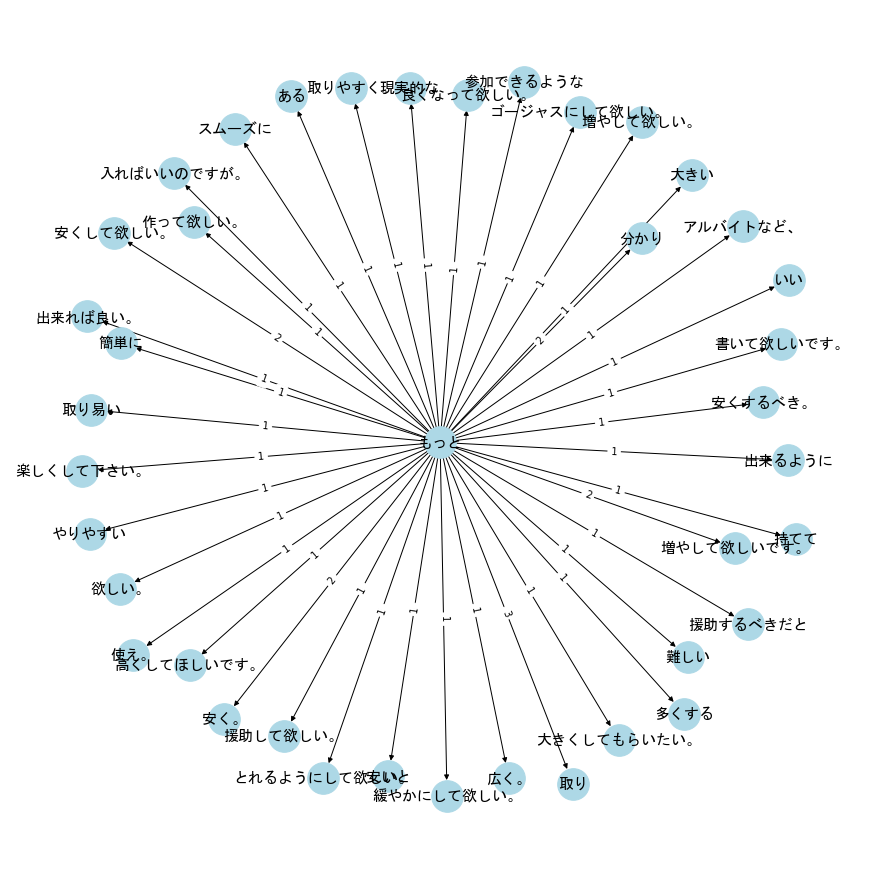

In [57]:
styles = {'node_size':1000,
          'font_size':15,
          'node_color':'lightblue',
          'with_labels':True,
          'font_weight':'bold',
          'font_family':'MS Gothic'}

G5 = nx.DiGraph()

# nodeデータの追加
nodes5 = ['もっと']+list([d3.Term2[d3.Term1=='もっと']][0])
edges5 = [(d3.loc[i, 'Term1'], d3.loc[i, 'Term2'], d3.loc[i, '度数']) for i in range(len(d3)) if d3.loc[i, 'Term1'] == 'もっと']

plt.figure(figsize=(12,12))
make_graph(G5, nodes5, edges5, pos=nx.spring_layout, styles=styles, label=True)

次に、「学費を」でからパス4までのノードをプロットした結果を示す。

In [77]:
g = nx.Graph()
g.add_nodes_from(nodes4)
g.add_edges_from([(d3.loc[i, 'Term1'], d3.loc[i, 'Term2']) for i in range(len(d3))])
targets = list(nx.single_target_shortest_path(g, "学費を", cutoff=4).keys())
g.add_edges_from([(d3.loc[i, 'Term1'], d3.loc[i, 'Term2']) for i in range(len(d3))])
targets3 = list(nx.single_target_shortest_path(g, "学費を", cutoff=3).keys())

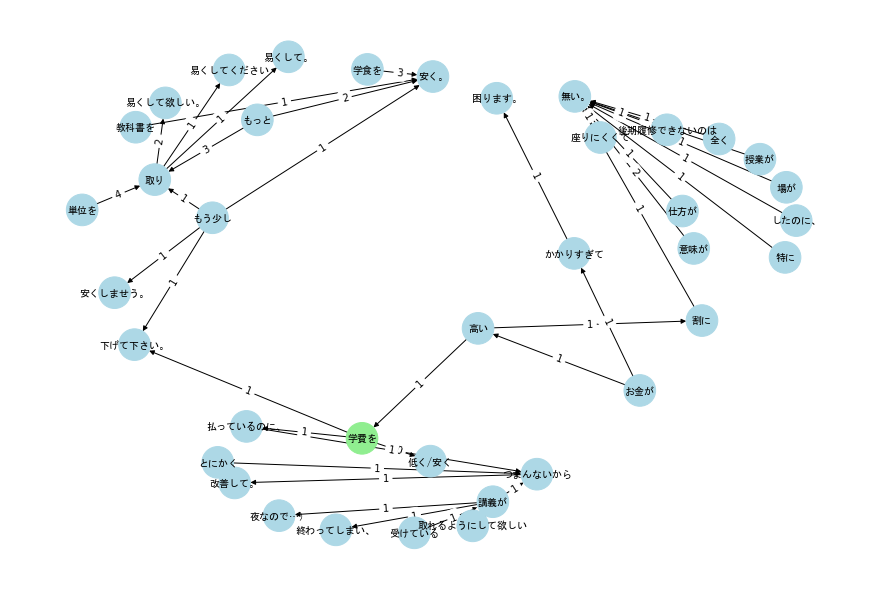

In [65]:
styles = {'node_size':1000,
          'font_size':10,
          'node_color':'lightblue',
          'with_labels':True,
          'font_weight':'bold',
          'font_family':'MS Gothic'}

G6 = nx.DiGraph()
 
# nodeデータの追加
nodes6 = targets
edges6 = [(d3.loc[i, 'Term1'], d3.loc[i, 'Term2'], d3.loc[i, '度数'])
             for i in range(len(d3)) if (d3.loc[i, 'Term1'] in targets3)|(d3.loc[i, 'Term2'] in targets3)]

# 色の設定
color_map = []
for node in nodes6:
    if node == '学費を':
        color_map.append('lightgreen')
    else:
        color_map.append('lightblue')

styles['node_color'] = color_map

pos = lambda x: nx.spring_layout(x, pos=nx.spectral_layout(x, scale=0.25), k=0.25,iterations=30)
    

plt.figure(figsize=(12,8))
make_graph(G6, nodes6, edges6, pos=pos, styles=styles, label=True)

ここでは、エッジの太さを共起頻度に比例させたグラフを示しているが、「学費を→低く/安く」が太く目立っている。  
これは、アンケート結果では、学費に不満があることを物語っている。

#### コミュニティの考察
ここでは、ガーバンニューマンのアルゴリズムを利用したコミュニティ分析の例を示す。

In [71]:
from networkx.algorithms import community
import itertools

k = 3

comp = community.girvan_newman(G6)

community_list = []
for communities in itertools.islice(comp, k-1):
    community_list.append(tuple(sorted(c) for c in communities))
community_list = list(community_list[k-2])

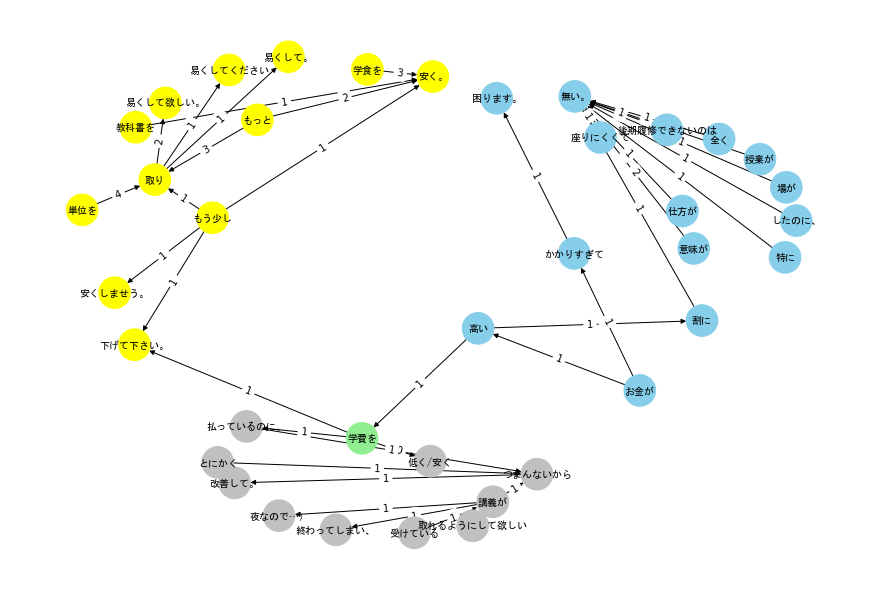

In [72]:
color_map = []

for node in nodes6:
    if node == '学費を':
        color_map.append('lightgreen')
    elif node in community_list[0]:
        color_map.append('silver')
    elif node in community_list[1]:
        color_map.append('yellow')
    else:
        color_map.append('skyblue')

styles['node_color'] = color_map
plt.figure(figsize=(12,8))
make_graph(G6, nodes6, edges6, pos=pos, styles=styles, label=True)

### 5.4 共起の強さの係数
**共起関係**の強さは、共起頻度にある程度反映される。  
ただし、頻度が高いからと言って必ずしも共起関係が強いとは限らない。  
共起データのペアを分割表にしたものの一般形を示す。

||||||
|-|-|-|-|-|
||||Y||
|||1|0|合計|
|X|1|$$a=f_{11}$$|$$b=f_{12}$$|$$a+b=f_{1+}$$|
| |0|$$c=f_{21}$$|$$d=f_{22}$$|$$c+d=f_{2+}$$|
| |合計|$$a+c=f_{+1}$$|$$b+d=f_{+2}$$|$$N=a+b+c+d$$|

言語データにおける共起データでは、一般的に$d=f_{22}$の値が突出する場合が多く、全体のファイ係数に影響を与えている。  
このようなこともあり、$X$、$Y$関係に関する測度が多数提案されている。  
2つの項目の共起の強さを計測する分野では、連関測度とも呼ぶ。  
日本では、Jaccard係数が多く用いられている。  
  
語$x$と$y$の共起の確率は$p(x,y)=p(x)p(y|x)$、$p(x,y)=p(y)p(x|y)$で求めることができる。  
この両式が成り立つ確率は次式となる。
$$
p(y|x)p(x|y)=\frac{p(x,y)^2}{p(x)p(y)}
$$

これを表の表記で示すと$a^2/(a+b)(c+d)$となる。  
これを同時条件付き確率と呼ぶことにする。これはOchiai測度の2乗に等しい。

In [85]:
G = nx.Graph()
G.add_nodes_from(nodes4)
G.add_weighted_edges_from(edges4)

j_coef = [(a,b,c) for a,b,c in nx.jaccard_coefficient(G) if c != 0]
j_20 = sorted(j_coef, key=lambda x: x[2], reverse=True)[:20]

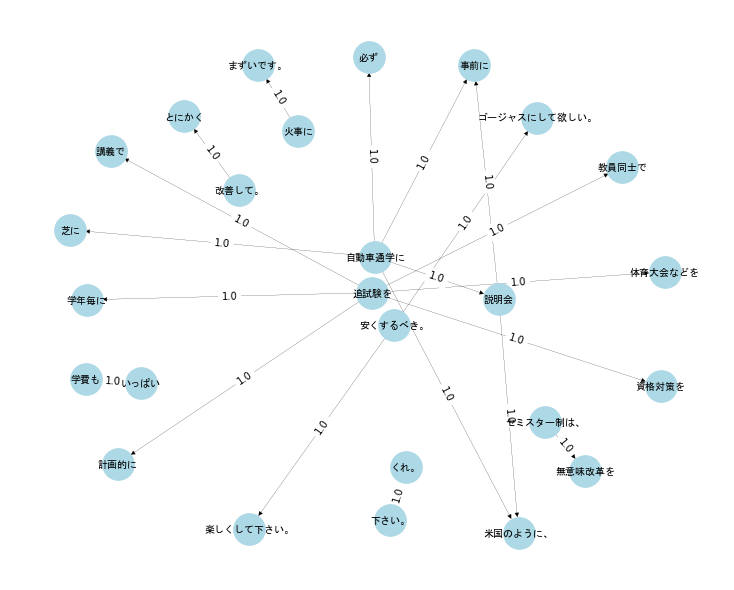

In [86]:
styles = {'node_size':1000,
          'font_size':10,
          'node_color':'lightblue',
          'with_labels':True,
          'font_weight':'bold',
          'font_family':'MS Gothic',
          'width':0.2}

G7 = nx.DiGraph()

# nodeデータの追加
nodes7 = np.unique(np.array(j_20)[:,0:2].ravel())
edges7 = j_20

pos = lambda x: nx.spring_layout(x, k=0.6,iterations=100)

plt.figure(figsize=(10,8))
make_graph(G7, nodes7, edges7, pos=pos, styles=styles, label=True)